In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare results tables

### RA treatment

In [3]:
gsea_folders = sorted([x for x in os.listdir('/DATA/users/magnitov/znf143/rnaseq/gsea/') if 'Gsea' in x])
gsea_folders = [x for x in gsea_folders if 'Hallmarks' in x or 'GO_BP' in x or 'Canonical_pathway' in x or 'Cell_type' in x or 'ESC' in x]

gsea_data_dmso = pd.DataFrame()
for folder in [x for x in gsea_folders if 'ra_dmso' in x and 'dtag' not in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_dmso = pd.concat([gsea_data_dmso, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_dmso.columns = ['NAME', 'SIZE', 'NES_RA_DMSO', 'FDR_RA_DMSO']

gsea_data_dtag = pd.DataFrame()
for folder in [x for x in gsea_folders if 'ra_dtag' in x and 'dmso' not in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_dtag = pd.concat([gsea_data_dtag, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_dtag.columns = ['NAME', 'SIZE', 'NES_RA_dTAG', 'FDR_RA_dTAG']

gsea_data = gsea_data_dmso.merge(gsea_data_dtag, on = ['NAME'])
gsea_data = gsea_data[[x for x in gsea_data.columns if 'SIZE' not in x]]
gsea_data.head()

,NAME,NES_RA_DMSO,FDR_RA_DMSO,NES_RA_dTAG,FDR_RA_dTAG
0,REACTOME_COLLAGEN_DEGRADATION,2.019908,0.000074,1.790908,0.006997
1,REACTOME_COLLAGEN_FORMATION,1.993057,0.000075,1.902467,0.001329
2,REACTOME_COLLAGEN_BIOSYNTHESIS_AND_MODIFYING_E...,1.930546,0.000422,1.839041,0.002692
3,REACTOME_ER_PHAGOSOME_PATHWAY,1.924427,0.000446,1.854404,0.002642
4,REACTOME_ASSEMBLY_OF_COLLAGEN_FIBRILS_AND_OTHE...,1.919626,0.000401,1.829602,0.002839


In [5]:
gsea_data.to_csv('./annotations/gsea_rnaseq_ra_effects.tsv', sep = '\t', header = 1, index = 0)

### dTAG treatment

In [6]:
gsea_folders = sorted([x for x in os.listdir('/DATA/users/magnitov/znf143/rnaseq/gsea/') if 'Gsea' in x])
gsea_folders = [x for x in gsea_folders if 'Hallmarks' in x or 'GO_BP' in x or 'GO_CC' in x or 'ZFP143' in x]

gsea_data_24H = pd.DataFrame()
for folder in [x for x in gsea_folders if 'dtag_dmso' in x and 'ra_' not in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_24H = pd.concat([gsea_data_24H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_24H.columns = ['NAME', 'SIZE', 'NES_dTAG_DMSO', 'FDR_dTAG_DMSO']

gsea_data_48H = pd.DataFrame()
for folder in [x for x in gsea_folders if 'ra_dtag_dmso' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/rnaseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_48H = pd.concat([gsea_data_48H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_48H.columns = ['NAME', 'SIZE', 'NES_RA+dTAG_RA+DMSO', 'FDR_RA+dTAG_RA+DMSO']

gsea_data = gsea_data_24H.merge(gsea_data_48H, on = ['NAME'])
gsea_data = gsea_data[[x for x in gsea_data.columns if 'SIZE' not in x]]
gsea_data.head()

,NAME,NES_dTAG_DMSO,FDR_dTAG_DMSO,NES_RA+dTAG_RA+DMSO,FDR_RA+dTAG_RA+DMSO
0,GOBP_NEGATIVE_REGULATION_OF_MUSCLE_CONTRACTION,1.996690,0.007468,1.812976,0.070922
1,GOBP_NEGATIVE_REGULATION_OF_SMOOTH_MUSCLE_CONT...,1.975856,0.007134,1.581208,0.175655
2,GOBP_CATECHOL_CONTAINING_COMPOUND_BIOSYNTHETIC...,1.929743,0.020018,1.130261,0.562461
3,GOBP_RESPONSE_TO_PROTOZOAN,1.919781,0.019222,0.985094,0.751153
4,GOBP_REGULATION_OF_SMOOTH_MUSCLE_CONTRACTION,1.919545,0.015454,1.855557,0.058484


In [7]:
gsea_data.to_csv('./annotations/gsea_rnaseq_dtag_effects.tsv', sep = '\t', header = 1, index = 0)

## RA results analysis

In [8]:
gsea_data = pd.read_csv('./annotations/gsea_rnaseq_ra_effects.tsv', sep = '\t')
gsea_data.head()

,NAME,NES_RA_DMSO,FDR_RA_DMSO,NES_RA_dTAG,FDR_RA_dTAG
0,REACTOME_COLLAGEN_DEGRADATION,2.0199084,0.000074,1.7909077,0.006997
1,REACTOME_COLLAGEN_FORMATION,1.993057,0.000075,1.9024668,0.001329
2,REACTOME_COLLAGEN_BIOSYNTHESIS_AND_MODIFYING_E...,1.9305463,0.000422,1.8390412,0.002692
3,REACTOME_ER_PHAGOSOME_PATHWAY,1.9244269,0.000446,1.8544035,0.002642
4,REACTOME_ASSEMBLY_OF_COLLAGEN_FIBRILS_AND_OTHE...,1.9196264,0.000401,1.8296018,0.002839


In [9]:
gsea_data_significant = gsea_data[(gsea_data['FDR_RA_DMSO'] < 0.1) | (gsea_data['FDR_RA_dTAG'] < 0.1)]
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_RA_DMSO'] != '---']
gsea_data_significant = gsea_data_significant[gsea_data_significant['NES_RA_dTAG'] != '---']
gsea_data_significant['NES_RA_DMSO'] = [float(x) for x in gsea_data_significant['NES_RA_DMSO']]
gsea_data_significant['NES_RA_dTAG'] = [float(x) for x in gsea_data_significant['NES_RA_dTAG']]
gsea_data_significant.sort_values(['FDR_RA_DMSO'])

,NAME,NES_RA_DMSO,FDR_RA_DMSO,NES_RA_dTAG,FDR_RA_dTAG
1490,GOBP_EMBRYONIC_SKELETAL_SYSTEM_DEVELOPMENT,2.104816,0.000000,2.039757,0.000099
9309,HALLMARK_MYC_TARGETS_V2,-2.858932,0.000000,-2.780068,0.000000
743,REACTOME_MRNA_SPLICING,-2.843119,0.000000,-2.810039,0.000000
744,REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAININ...,-2.727822,0.000000,-2.713687,0.000000
745,REACTOME_MAJOR_PATHWAY_OF_RRNA_PROCESSING_IN_T...,-2.644583,0.000000,-3.000298,0.000000
...,...,...,...,...,...
8717,GOBP_ATP_SYNTHESIS_COUPLED_ELECTRON_TRANSPORT,-0.882008,0.847039,-1.894581,0.022488
1136,REACTOME_PROTEIN_HYDROXYLATION,-0.853423,0.853716,-1.749239,0.034686
1418,ZHANG_UTERUS_C13_EPITHELIAL1_CELL,0.582674,1.000000,-2.012979,0.001531
544,REACTOME_CROSS_PRESENTATION_OF_SOLUBLE_EXOGENO...,0.818641,1.000000,-1.821557,0.019783


In [10]:
gsea_data_significant[gsea_data_significant['NES_RA_DMSO'] < 0]['NAME'].values

array(['REACTOME_MRNA_SPLICING',
       'REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA',
       'REACTOME_MAJOR_PATHWAY_OF_RRNA_PROCESSING_IN_THE_NUCLEOLUS_AND_CYTOSOL',
       'REACTOME_TRANSPORT_OF_MATURE_MRNAS_DERIVED_FROM_INTRONLESS_TRANSCRIPTS',
       'REACTOME_TRANSPORT_OF_THE_SLBP_DEPENDANT_MATURE_MRNA',
       'REACTOME_SNRNP_ASSEMBLY',
       'REACTOME_POSITIVE_EPIGENETIC_REGULATION_OF_RRNA_EXPRESSION',
       'REACTOME_RNA_POLYMERASE_I_TRANSCRIPTION_TERMINATION',
       'REACTOME_RNA_POLYMERASE_II_TRANSCRIPTION_TERMINATION',
       'REACTOME_MRNA_SPLICING_MINOR_PATHWAY',
       'REACTOME_TRANSCRIPTIONAL_REGULATION_BY_SMALL_RNAS',
       'REACTOME_FORMATION_OF_RNA_POL_II_ELONGATION_COMPLEX',
       'REACTOME_NUCLEAR_PORE_COMPLEX_NPC_DISASSEMBLY',
       'REACTOME_ACTIVATION_OF_THE_PRE_REPLICATIVE_COMPLEX',
       'REACTOME_SUMOYLATION_OF_SUMOYLATION_PROTEINS',
       'REACTOME_TP53_REGULATES_TRANSCRIPTION_OF_DNA_REPAIR_GENES',
       'REACTOME_RNA_POLYMERASE_III_TR

In [11]:
terms_to_plot = ['WONG_EMBRYONIC_STEM_CELL_CORE',
                 'GOBP_NEGATIVE_REGULATION_OF_STEM_CELL_DIFFERENTIATION', 'GOBP_POSITIVE_REGULATION_OF_STEM_CELL_DIFFERENTIATION',
                 'GOBP_CELLULAR_RESPONSE_TO_RETINOIC_ACID', 'REACTOME_NEURONAL_SYSTEM',
                 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION']

gsea = gsea_data[gsea_data['NAME'].isin(terms_to_plot)]
gsea = gsea[gsea['NES_RA_DMSO'] != '---']
gsea = gsea[gsea['NES_RA_dTAG'] != '---']
for col in gsea.columns[1:]:   
    gsea[col] = [float(x) for x in gsea[col]]
gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)
gsea

,NAME,NES_RA_DMSO,FDR_RA_DMSO,NES_RA_dTAG,FDR_RA_dTAG
1489,WONG_EMBRYONIC_STEM_CELL_CORE,-2.231884,0.000000,-2.905463,0.000000
7329,GOBP_NEGATIVE_REGULATION_OF_STEM_CELL_DIFFEREN...,-1.971595,0.016579,-1.712560,0.096011
1522,GOBP_POSITIVE_REGULATION_OF_STEM_CELL_DIFFEREN...,1.763103,0.032138,1.829705,0.023089
1577,GOBP_CELLULAR_RESPONSE_TO_RETINOIC_ACID,1.680896,0.067989,1.654220,0.062802
27,REACTOME_NEURONAL_SYSTEM,1.654767,0.049468,1.671968,0.040538
9267,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,1.686703,0.010706,1.602101,0.021126


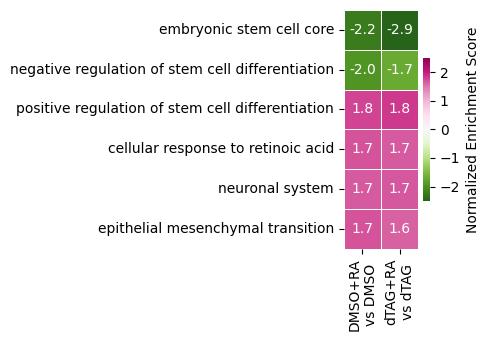

In [12]:
mask = gsea[['FDR_RA_DMSO', 'FDR_RA_dTAG']] >= 0.1
mask_annotation = np.reshape(['.' if x==True else round(y, 1) for (x, y) in zip(mask.values.flatten(), gsea[['NES_RA_DMSO', 'NES_RA_dTAG']].values.flatten())], (len(gsea), 2))

plt.figure(figsize = (1.2, 3.1))
sns.heatmap(gsea[['NES_RA_DMSO', 'NES_RA_dTAG']], cmap = 'PiYG_r', center = 0, vmin = -2.5, vmax = 2.5, xticklabels = ['DMSO+RA\nvs DMSO', 'dTAG+RA\nvs dTAG'], 
            yticklabels = [' '.join(x.split('_')[1:]).lower() for x in gsea['NAME'].values], 
            annot = np.array(mask_annotation), fmt='.1f', cbar = 2, cbar_kws = {'shrink': 0.6, 'label': 'Normalized Enrichment Score'}, linewidth = 0.5)

plt.show()

## dTAG results analysis

In [13]:
gsea_data = pd.read_csv('./annotations/gsea_rnaseq_dtag_effects.tsv', sep = '\t')
gsea_data.head()

,NAME,NES_dTAG_DMSO,FDR_dTAG_DMSO,NES_RA+dTAG_RA+DMSO,FDR_RA+dTAG_RA+DMSO
0,GOBP_NEGATIVE_REGULATION_OF_MUSCLE_CONTRACTION,1.996690,0.007468,1.812976,0.070922
1,GOBP_NEGATIVE_REGULATION_OF_SMOOTH_MUSCLE_CONT...,1.975856,0.007134,1.581208,0.175655
2,GOBP_CATECHOL_CONTAINING_COMPOUND_BIOSYNTHETIC...,1.929743,0.020018,1.130261,0.562461
3,GOBP_RESPONSE_TO_PROTOZOAN,1.919781,0.019222,0.985094,0.751153
4,GOBP_REGULATION_OF_SMOOTH_MUSCLE_CONTRACTION,1.919545,0.015454,1.855557,0.058484


In [14]:
gsea_data_significant = gsea_data[(gsea_data['FDR_dTAG_DMSO'] < 0.05) | (gsea_data['FDR_RA+dTAG_RA+DMSO'] < 0.05)]
gsea_data_significant.sort_values(['NES_RA+dTAG_RA+DMSO'])

,NAME,NES_dTAG_DMSO,FDR_dTAG_DMSO,NES_RA+dTAG_RA+DMSO,FDR_RA+dTAG_RA+DMSO
5203,GOBP_CYTOPLASMIC_TRANSLATION,-1.429071,0.741287,-2.769629,0.000000
8264,GOCC_CYTOSOLIC_LARGE_RIBOSOMAL_SUBUNIT,-1.606258,0.375470,-2.767785,0.000000
8350,GOCC_CYTOSOLIC_RIBOSOME,-1.407584,0.431542,-2.744749,0.000000
5821,GOBP_TRANSLATION_AT_SYNAPSE,-1.180731,0.788077,-2.734919,0.000000
8251,GOCC_RIBOSOMAL_SUBUNIT,-1.679455,0.295135,-2.677557,0.000000
...,...,...,...,...,...
391,GOBP_AXONEME_ASSEMBLY,1.499565,0.283887,2.137293,0.000558
398,GOBP_SPERM_MOTILITY,1.496293,0.288638,2.166832,0.000161
1096,GOBP_EXTRACELLULAR_TRANSPORT,1.320726,0.460551,2.257218,0.000000
154,GOBP_CILIUM_OR_FLAGELLUM_DEPENDENT_CELL_MOTILITY,1.611056,0.188700,2.325553,0.000000


In [15]:
gsea_data_significant['NAME'].values

array(['GOBP_NEGATIVE_REGULATION_OF_MUSCLE_CONTRACTION',
       'GOBP_NEGATIVE_REGULATION_OF_SMOOTH_MUSCLE_CONTRACTION',
       'GOBP_CATECHOL_CONTAINING_COMPOUND_BIOSYNTHETIC_PROCESS',
       'GOBP_RESPONSE_TO_PROTOZOAN',
       'GOBP_REGULATION_OF_SMOOTH_MUSCLE_CONTRACTION',
       'GOBP_AMINO_ACID_IMPORT_ACROSS_PLASMA_MEMBRANE',
       'GOBP_C21_STEROID_HORMONE_METABOLIC_PROCESS',
       'GOBP_RESPONSE_TO_IRON_ION',
       'GOBP_POSITIVE_REGULATION_OF_MEIOTIC_CELL_CYCLE',
       'GOBP_SENSORY_PERCEPTION_OF_CHEMICAL_STIMULUS',
       'GOBP_REGULATION_OF_CILIUM_MOVEMENT',
       'GOBP_CILIUM_OR_FLAGELLUM_DEPENDENT_CELL_MOTILITY',
       'GOBP_REPRODUCTIVE_BEHAVIOR',
       'GOBP_ADENYLATE_CYCLASE_MODULATING_G_PROTEIN_COUPLED_RECEPTOR_SIGNALING_PATHWAY',
       'GOBP_CILIUM_MOVEMENT', 'GOBP_REGULATION_OF_CILIUM_BEAT_FREQUENCY',
       'GOBP_AXONEME_ASSEMBLY', 'GOBP_SPERM_MOTILITY',
       'GOBP_REGULATION_OF_BONE_RESORPTION',
       'GOBP_REGULATION_OF_MICROTUBULE_BASED_MOVEMENT',
    

In [20]:
terms_to_plot = ['ZFP143_TARGET_GENES', 
                 'GOCC_ORGANELLAR_RIBOSOME',
                 'HALLMARK_OXIDATIVE_PHOSPHORYLATION',
                 'HALLMARK_GLYCOLYSIS',
                 'HALLMARK_FATTY_ACID_METABOLISM',
                 'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY']

gsea = gsea_data[gsea_data['NAME'].isin(terms_to_plot)]
gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)
gsea

/tmp/ipykernel_1736122/1470996710.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)


,NAME,NES_dTAG_DMSO,FDR_dTAG_DMSO,NES_RA+dTAG_RA+DMSO,FDR_RA+dTAG_RA+DMSO
8852,ZFP143_TARGET_GENES,-3.290918,0.000000,-2.389676,0.000000
8232,GOCC_ORGANELLAR_RIBOSOME,-1.877993,0.134576,-1.878282,0.019855
8832,HALLMARK_OXIDATIVE_PHOSPHORYLATION,-1.973872,0.000292,-2.253090,0.000000
8838,HALLMARK_GLYCOLYSIS,-1.179451,0.370863,-1.618525,0.010504
8837,HALLMARK_FATTY_ACID_METABOLISM,-1.212075,0.337621,-1.579237,0.013525
8839,HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,-1.174985,0.339990,-1.718385,0.005687


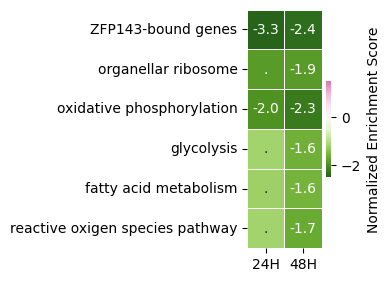

In [22]:
mask = gsea[['FDR_dTAG_DMSO', 'FDR_RA+dTAG_RA+DMSO']] >= 0.1
mask_annotation = np.reshape(['.' if x==True else round(y, 1) for (x, y) in zip(mask.values.flatten(), gsea[['NES_dTAG_DMSO', 'NES_RA+dTAG_RA+DMSO']].values.flatten())], (len(gsea), 2))

plt.figure(figsize = (1.2, 3.1))
sns.heatmap(gsea[['NES_dTAG_DMSO', 'NES_RA+dTAG_RA+DMSO']], cmap = 'PiYG_r', center = 0, vmin = -2.5, vmax = 1.5, xticklabels = ['24H', '48H'], 
            yticklabels = [' '.join(x.split('_')[1:]).lower().replace('target ', 'ZFP143-bound ').replace('mtorc', 'MTORC').replace('g2m ', 'G2M ').replace('e2f ', 'E2F ').replace('nadh ', 'NADH ').replace('tnfa ', 'TNFa ').replace('nfkb', 'NFkB').replace('myc ', 'MYC ').replace('atp ', 'ATP ').replace('target ', 'ZFP143 target ') for x in gsea['NAME'].values], 
            annot = np.array(mask_annotation), fmt='s', cbar = 2, cbar_kws = {'shrink': 0.4, 'label': 'Normalized Enrichment Score'}, linewidth = 0.5)
plt.show()